In [1]:
import psycopg2
import pandas as pd

In [2]:
DBNAME = "opportunity_youth"

In [3]:
conn = psycopg2.connect(dbname=DBNAME)

In [4]:
cursor = conn.cursor()
cursor.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
tables = []
for table in cursor.fetchall():
    tables.append(table[0])
tables

['pums_2017',
 'puma_names_2010',
 'wa_jobs_2017',
 'wa_geo_xwalk',
 'ct_puma_xwalk']

In [5]:

king_puma_df = pd.read_sql("""SELECT * FROM puma_names_2010 
                WHERE state_name 
                LIKE 'Washington%' 
                AND puma_name LIKE 'King County%';""", conn)

king_puma_df


,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
1,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
2,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...
3,53,Washington ...,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Me..."
4,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
5,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
6,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
7,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
8,53,Washington ...,1044,11616,5311616,G53011616,"King County (Northeast)--Snoqualmie City, Cott..."
9,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."


In [6]:
pums_2017_df = pd.read_sql("SELECT * FROM pums_2017 LIMIT 20;", conn)
puma_names_2010_df = pd.read_sql("SELECT * FROM puma_names_2010 LIMIT 20;", conn)
wa_jobs_2017_df = pd.read_sql("SELECT * FROM wa_jobs_2017 LIMIT 20;", conn)
wa_geo_xwalk_df = pd.read_sql("SELECT * FROM wa_geo_xwalk;", conn)
ct_puma_xwalk_df = pd.read_sql("SELECT * FROM ct_puma_xwalk LIMIT 20;", conn)

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
gdf = gpd.read_file("C:/Users/ptann/OneDrive/Documents/Flatiron/Projects/Phase/new_repo/phase-1-project-west-ds-082420/shapefiles")

In [10]:
pd.set_option('display.max_colwidth',1000)
king_puma_df


,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & Bothell (South) Cities"
1,53,Washington,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cities, Inglewood & Finn Hill"
2,53,Washington,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Bellevue City
3,53,Washington,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Mercer Island & Newcastle Cities"
4,53,Washington,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, Bryn Mawr & Skyway"
5,53,Washington,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City
6,53,Washington,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakeland
7,53,Washington,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covington & Enumclaw Cities"
8,53,Washington,1044,11616,5311616,G53011616,"King County (Northeast)--Snoqualmie City, Cottage Lake, Union Hill & Novelty Hill"
9,53,Washington,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tukwila Cities & White Center"


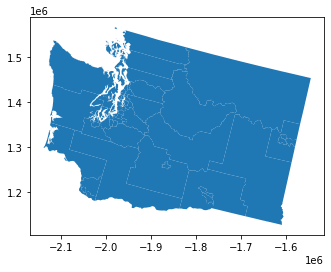

In [11]:
gdf_washington = gdf[(gdf.State=='Washington')]
gdf_washington.plot()

In [12]:

gdf["PUMA"] = gdf["PUMA"].astype(str).astype(int)
snohomish_map = gdf[(gdf.PUMA >= 11701) & (gdf.PUMA <= 11706)] #maps snohomish county, washington
pierce_map = gdf[(gdf.PUMA >= 11501) & (gdf.PUMA <= 11507)] #maps pierce county washington
greater_king_co_map= gdf[(gdf.PUMA >= 11606) & (gdf.PUMA <= 11616)] #maps king county washington
south_king_co_map=gdf[(gdf.PUMA >= 11612) & (gdf.PUMA <= 11615)] #maps so. king county washington


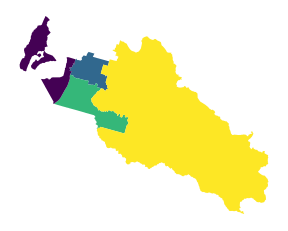

In [13]:
#choloropleth map showing the different regions of South King County by PUMA codes
#PUMA #:
    
ax=south_king_co_map.plot(column= 'PUMA')

ax.axis('off')
plt.show()


In [14]:
south_king_co_map.head()

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
323,5311613,G53011613,5311613,53,Washington,11613,King County (Southwest Central)--Kent City PUMA,"POLYGON ((-1964607.872 1382415.161, -1964615.518 1382399.296, -1964811.648 1381992.936, -1964828.786 1381957.478, -1964907.335 1381794.822, -1964991.216 1381622.535, -1965133.967 1381327.035, -1965138.773 1381317.026, -1965143.622 1381307.145, -1965106.975 1381294.472, -1965070.374 1381289.163, -1965046.783 1381284.436, -1965010.402 1381275.285, -1964977.558 1381265.068, -1964959.784 1381259.577, -1964944.099 1381254.791, -1964828.121 1381221.385, -1964783.650 1381209.601, -1964604.399 1381157.255, -1964492.591 1381125.839, -1964437.512 1381109.446, -1964419.257 1381103.706, -1964409.779 1381100.679, -1964390.020 1381094.398, -1964382.627 1381090.697, -1964375.938 1381084.785, -1964374.142 1381082.210, -1964370.762 1381076.315, -1964369.344 1381072.124, -1964366.516 1381047.552, -1964364.257 1381042.434, -1964360.012 1381038.476, -1964357.314 1381037.138, -1964351.304 1381036.356, -1964347.596 1381036.914, -1964341.838 1381039.419, -1964337.906 1381042.441, -1964316.127 1381074.519..."
324,5311614,G53011614,5311614,53,Washington,11614,King County (Southwest)--Auburn City & Lakeland PUMA,"POLYGON ((-1962306.184 1370551.322, -1962307.718 1370549.803, -1962339.244 1370519.537, -1962386.381 1370460.831, -1962410.672 1370425.422, -1962435.356 1370386.104, -1962459.667 1370343.350, -1962486.555 1370294.547, -1962635.213 1370031.230, -1962654.425 1370001.507, -1962676.145 1369971.575, -1962701.765 1369939.297, -1962723.738 1369913.226, -1962731.230 1369904.315, -1962740.322 1369895.051, -1962753.515 1369881.892, -1962766.563 1369868.692, -1962807.642 1369830.901, -1962852.517 1369793.378, -1962908.070 1369754.964, -1962970.009 1369717.435, -1962998.294 1369701.186, -1963100.262 1369660.373, -1963260.064 1369610.853, -1963314.207 1369592.832, -1963381.528 1369572.906, -1963407.266 1369554.216, -1963480.779 1369509.850, -1963518.031 1369485.912, -1963555.973 1369457.574, -1963609.101 1369412.391, -1963628.851 1369394.767, -1963662.642 1369360.433, -1963695.944 1369322.515, -1963730.125 1369278.413, -1963762.131 1369232.778, -1963791.606 1369184.361, -1963819.182 1369132.879..."
325,5311615,G53011615,5311615,53,Washington,11615,"King County (Southeast)--Maple Valley, Covington & Enumclaw Cities PUMA","POLYGON ((-1940930.854 1384594.946, -1940902.436 1384564.283, -1940866.338 1384525.622, -1940790.617 1384442.038, -1940744.547 1384391.182, -1940718.321 1384360.560, -1940686.765 1384322.253, -1940633.117 1384254.022, -1940613.070 1384227.194, -1940468.834 1384030.276, -1940460.409 1384018.743, -1940391.664 1383926.792, -1940269.110 1383767.145, -1940151.965 1383609.816, -1940108.394 1383541.541, -1940092.667 1383515.579, -1940062.221 1383460.610, -1940046.993 1383430.888, -1940034.018 1383404.089, -1940005.880 1383343.113, -1939923.110 1383161.333, -1939908.543 1383133.746, -1939886.256 1383096.889, -1939869.815 1383072.907, -1939845.423 1383038.788, -1939833.461 1383023.286, -1939820.826 1383007.939, -1939804.550 1382989.280, -1939775.666 1382958.838, -1939744.712 1382929.882, -1939712.099 1382902.642, -1939694.162 1382888.796, -1939675.828 1382875.527, -1939654.736 1382861.143, -1939633.186 1382847.549, -1939597.238 1382826.604, -1939561.511 1382808.245, -1939542.206 1382799.294..."
330,5311612,G53011612,5311612,53,Washington,11612,"King County (Far Southwest)--Federal Way, Des Moines Cities & Vashon Island PUMA","MULTIPOLYGON (((-1973517.655 1381132.018, -1973486.815 1381066.954, -1973466.644 1381080.980, -1973460.293 1381090.548, -1973447.831 1381128.825, -1973443.064 1381139.762, -1973435.548 1381148.425, -1973427.540 1381153.271, -1973424.198 1381155.308, -1973409.653 1381155.653, -1973395.491 1381152.431, -1973267.683 1381113.568, -1973078.234 1381056.610, -1972973.388 1381024.165, -1972957.629 1381019.341, -1972901.149 1381002.254, -1972888.063 1380998.304, -1972796.735 138097

In [ ]:
#join the geodataframe with the cleaned up dictionary dataframe

merged= south_king_co_map.set_index('Name').join(^name_of_data_dict_oy_here^.set_index('PUMA'))
merged.head()

In [ ]:
#set a variable that will call whatever column we want to visualize on the map

variable = '#oy-count'

#set the range for the choropleth

vmin, vmax= 120, 220

#create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize= (10,6))

#create map

merged.plot(column = variable, cmap 'Blues', linewidth = 0.8, ax = ax, edgecolor = '0.8')

#remove the axis

ax.axis('off')

#add a title

ax.set_title(OY Per Region of South King County, fontdict={'fontsize': '25','fontweight':'3'})



#create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin-vmin, vmax=vmax))

#empty array for the data range

sm._A = []

#add the colorbar to the figure

cbar = fig.colorbar(sm)

No handles with labels found to put in legend.


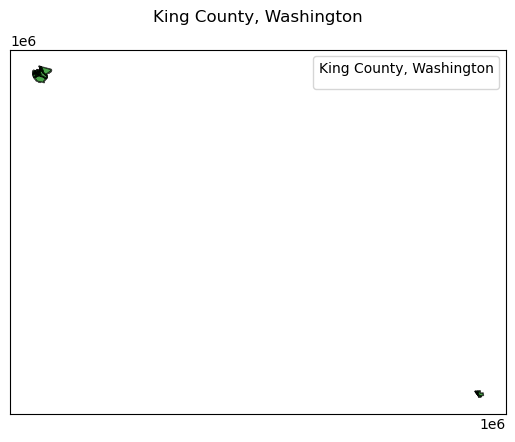

In [7]:
#plot the map
plt.style.use('default')
fig, ax = plt.subplots()

#pierce_map.plot(ax=ax, color='green', edgecolor = 'black', alpha=.7, legend= True, zorder = 1)
ax= south_king_co_map.plot(ax=ax, color='violet',edgecolor='black', alpha= .7, legend= True, zorder= 2)
#greater_king_co_map.plot(ax=ax, color = 'green', edgecolor='black', legend = True, alpha= .7, zorder=3);
#snohomish_map.plot(ax=ax, color= 'blue', edgecolor ='black', legend = True, alpha = .7, zorder = 4)
ax.set_title('King County, Washington', pad= 20)
ax.tick_params(bottom = False, 
               top = False, 
               left= False, 
               right = False,
               labelbottom = False,
               labelleft = False)
ax.legend(title="King County, Washington")


plt.show()




In [ ]:
south_king_co_map


In [ ]:
#unemployment codes:
# EMR  employment status code , unemployed status = 6-- not in labor force
#WKHP , 0 --

In [ ]:
#school status codes:


In [ ]:
pd.read_sql("""SELECT * FROM puma_names_2010 WHERE state_name LIKE 'Washington%' AND puma_name LIKE 'King County%';""", conn)